dS/dt=-bS+gI, dI/dt=bS-gI (uso b para beta y g para gamma)

In [1]:
from sympy import *
from sympy.abc import S,I,t,b,g

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

In [5]:
#puntos criticos
P=-b*S+g*I
Q=b*S-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#Eigenvalores y eigenvectores
M=Matrix([[-b,g],[b,-g]])
print(M.eigenvals())
pprint(M.eigenvects())

{S: I*g/b}
{-b - g: 1, 0: 1}
⎡⎛      ⎡⎡g⎤⎤⎞                     ⎤
⎢⎜      ⎢⎢─⎥⎥⎟  ⎛           ⎡⎡-1⎤⎤⎞⎥
⎢⎜0, 1, ⎢⎢b⎥⎥⎟, ⎜-b - g, 1, ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎝           ⎣⎣1 ⎦⎦⎠⎥
⎣⎝      ⎣⎣1⎦⎦⎠                     ⎦


In [ ]:
El punto critico es no hiperbolico, por lo que no cumple el teorema de Hartmann.

Analisis de bifurcaciones

a) beta<0, gamma<0 (gamma=g, beta=b)

In [10]:
#puntos criticos
P=b*S-g*I
Q=-b*S+g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#Eigenvalores y eigenvectores
M=Matrix([[b,-g],[-b,g]])
print(M.eigenvals())

{S: I*g/b}
{b + g: 1, 0: 1}


El punto critico es S=I*gamma/beta, con eigenvalores 0 y beta+gamma, por lo que es un punto critico no hiperbolico.

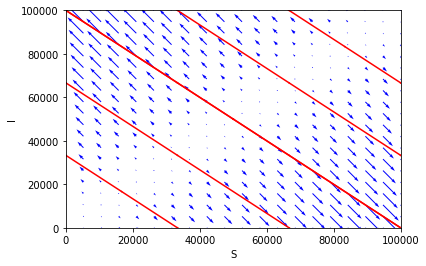

In [3]:
#sistema dS/dt=-b*S+g*I, dI/dt=b*S-g*I con beta<0, gamma<0
b=-1
g=-1
def dx_dt(x,t):
    return [ -b*x[0]+g*x[1] , b*x[0]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X+g*Y
v=b*X-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISnoinf01.pdf")
plt.show()

b) beta<0, gamma>0 (gamma=g, beta=b)

In [13]:
#puntos criticos
P=b*S+g*I
Q=-b*S-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#Eigenvalores y eigenvectores
M=Matrix([[b,-g],[-b,g]])
print(M.eigenvals())

{S: -I*g/b}
{b + g: 1, 0: 1}


El punto critico es S=-I*gamma/beta, con eigenvalores beta+gamm y 0, por lo que es un punto critico no hiperbolico.

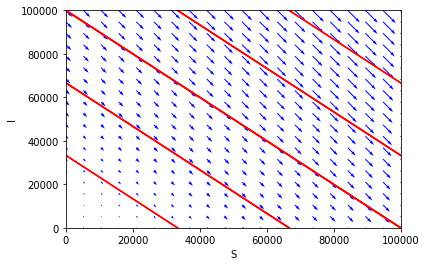

In [4]:
#sistema dS/dt=-b*S+g*I, dI/dt=b*S-g*I con beta<0, gamma>0
b=-1
g=1
def dx_dt(x,t):
    return [ -b*x[0]+g*x[1] , b*x[0]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X+g*Y
v=b*X-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISnoinf02.pdf")
plt.show()

c) beta<0, gamma=0 (gamma=g, beta=b)

In [5]:
#puntos criticos
P=b*S+0*I
Q=-b*S-0*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#Eigenvalores y eigenvectores
M=Matrix([[b,0],[-b,0]])
print(M.eigenvals())

{S: 0}
{-1: 1, 0: 1}


El punto critico ahora es S=0, es decir el eje y, el cual es un punto no hiperbolico.

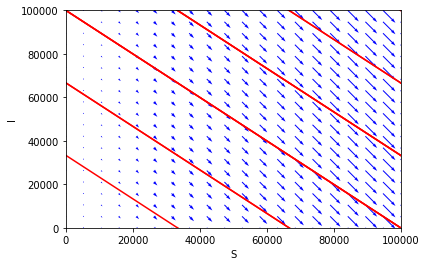

In [5]:
#sistema dS/dt=-b*S+g*I, dI/dt=b*S-g*I con beta<0, gamma=0
b=-1
g=0
def dx_dt(x,t):
    return [ -b*x[0]+g*x[1] , b*x[0]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X+g*Y
v=b*X-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISnoinf03.pdf")
plt.show()

d) beta>0, gamma<0 (gamma=g, beta=b)

In [8]:
#puntos criticos
P=-b*S-g*I
Q=b*S+g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#Eigenvalores y eigenvectores
M=Matrix([[-b,-g],[b,g]])
print(M.eigenvals())

{S: 0}
{1: 1, 0: 1}


(Hay algo raro con este punto critico, no se por que sale eso, deberia ser S=-I*gamma/beta

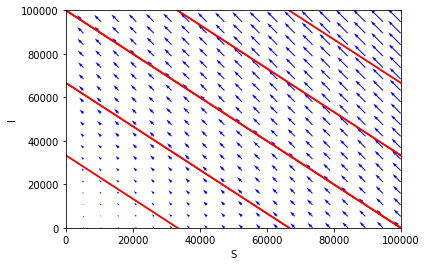

In [10]:
#sistema dS/dt=-b*S+g*I, dI/dt=b*S-g*I con beta>0, gamma<0
b=1
g=-1
def dx_dt(x,t):
    return [ -b*x[0]+g*x[1] , b*x[0]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X+g*Y
v=b*X-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISnoinf04.pdf")
plt.show()

e) beta>0, gamma>0 (gamma=g, beta=b)

In [3]:
#puntos criticos
P=-b*S+g*I
Q=b*S-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#Eigenvalores y eigenvectores
M=Matrix([[-b,g],[b,-g]])
print(M.eigenvals())

{S: I*g/b}
{-b - g: 1, 0: 1}


El punto critico es S=I*gamma/beta, como en el inciso a, y es un no hiperbolico.

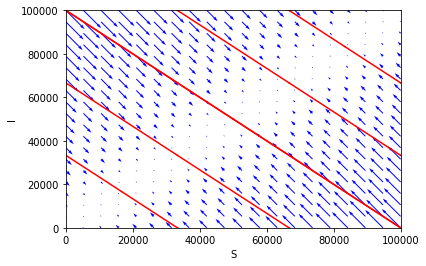

In [4]:
#sistema dS/dt=-b*S+g*I, dI/dt=b*S-g*I con beta>0, gamma>0
b=1
g=1
def dx_dt(x,t):
    return [ -b*x[0]+g*x[1] , b*x[0]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X+g*Y
v=b*X-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISnoinf05.pdf")
plt.show()

f) beta>0, gamma=0 (gamma=g, beta=b)

In [5]:
#puntos criticos
P=-b*S+0*I
Q=b*S-0*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#Eigenvalores y eigenvectores
M=Matrix([[-b,0],[b,0]])
print(M.eigenvals())

{S: 0}
{-1: 1, 0: 1}


El punto critico ahora es S=0, es decir el eje y, el cual es un punto no hiperbolico.

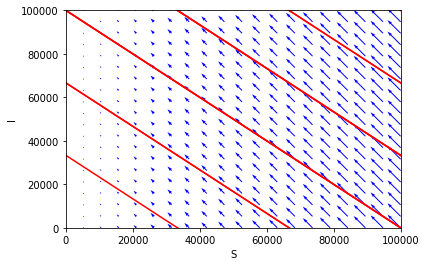

In [7]:
#sistema dS/dt=-b*S+g*I, dI/dt=b*S-g*I con beta>0, gamma=0
b=1
g=0
def dx_dt(x,t):
    return [ -b*x[0]+g*x[1] , b*x[0]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X+g*Y
v=b*X-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISnoinf06.pdf")
plt.show()

f) beta=0, gamma (en este caso no se como explicar que pasa con el punto critico, pero si se grafica sale en el eje x)